# Similarities and Differences between Categories (Pt.1 - Age, Gender, Won/Lost Amount)

In [2]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf
import counting_fns as cf

month_file = '6_October'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


In [3]:
# Read in data
df = pd.read_parquet("top_players.parquet")

# Round wageredamt and profit to 2 decimal places
df['wageredamt'] = df['wageredamt'].round(1)
df['profit'] = df['profit'].round(1)
df['percent_return'] = df['percent_return'].round(1)


In [4]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df['result_type'] = df['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df = pd.concat([df, dummy_variables], axis=1).reset_index(drop=True)

# Convert starttime to delte format for operations
df['start_time'] = pd.to_datetime(df['start_time'])

In [5]:
# Create new column called 'time_diff' which is the difference between the start time of the gamble and the start time of the previous gamble
df['time_diff'] = df.groupby(['playerkey', 'session_time'])['start_time'].diff()

# Convert time_diff to seconds
df['time_diff'] = df['time_diff'].dt.total_seconds().fillna(0)

## General Overview

### Players, Visits, Sessions of Each Group

In [6]:
# Number of gamblers
print("Number of gamblers in dataframe:", len(df['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in dtf:", len(df['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in dtf:", len(df['session_time'].unique()))
print('--------------------------------------------------')

Number of gamblers in dataframe: 557
--------------------------------------------------
Number of unique visits in dtf: 10
--------------------------------------------------
Number of unique sessions in dtf: 10
--------------------------------------------------


### Wins in a row

In [7]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df_s = pf.consecutive_wins(df, 'session_time')

In [8]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Categories of wins in a row per session:')
print(df_s.groupby(['clasification', 'session_time'])[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')

Categories of wins in a row per session:
                              #2ws   #3ws   #4ws
clasification session_time                      
top_1         1             2828.0  559.0  226.0
              2             1522.0  279.0  103.0
              3              874.0  146.0   62.0
              4              298.0   84.0   34.0
              5              104.0   17.0    5.0
              6               64.0   14.0    2.0
              7                5.0    2.0    0.0
              8                6.0    1.0    0.0
              9                6.0    1.0    0.0
              10               3.0    1.0    0.0
top_10        1             3113.0  551.0  194.0
              2             1139.0  211.0   60.0
              3              328.0   64.0   18.0
              4              110.0   14.0    8.0
              5               39.0   12.0    2.0
              6               12.0    3.0    2.0
              7                2.0    1.0    0.0
              8             

In [9]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per session_time per player
df = pf.consecutive_wins(df, 'visit')

In [10]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Categories of wins in a row per visit:')
print(df.groupby(['clasification', 'visit'])[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')


Categories of wins in a row per visit:
                       #2ws   #3ws   #4ws
clasification visit                      
top_1         1      1746.0  360.0  109.0
              2      1512.0  286.0  110.0
              3      1230.0  220.0   76.0
              4       684.0  123.0   70.0
              5       309.0   52.0   23.0
              6       101.0   23.0   15.0
              7        38.0   19.0   15.0
              8        67.0   20.0   14.0
              9         2.0    0.0    0.0
              10       17.0    2.0    0.0
top_10        1      2569.0  488.0  139.0
              2      1425.0  229.0   86.0
              3       570.0  107.0   43.0
              4       149.0   31.0   15.0
              5        24.0    3.0    1.0
              6         9.0    1.0    0.0
              7         0.0    0.0    0.0
top_5         1      3229.0  609.0  192.0
              2      2588.0  468.0  159.0
              3      1029.0  222.0   63.0
              4       390.0   66.0   

### Gender Differences

In [11]:
# Gender differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'gender'])['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in dtf:
clasification  gender
top_1          F          34
               M          22
top_10         F         129
               M         149
top_5          F         106
               M         117
Name: playerkey, dtype: int64
--------------------------------------------------


### Age Differences

In [12]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for dtf and top 20%
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_gen'] = pd.cut(df['age'], bins=bins, labels=generations, right=False)

df_s['age_range'] = pd.cut(df_s['age'], bins=bins, labels=labels, right=False)
df_s['age_gen'] = pd.cut(df_s['age'], bins=bins, labels=generations, right=False)

In [13]:
# Age range differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_range'])['playerkey'].nunique())
print('--------------------------------------------------')


Number of unique players in dtf:


clasification  age_range
top_1          18-24          0
               25-40          2
               41-55         25
               56-75         27
               76+            2
top_10         18-24          1
               25-40         57
               41-55         89
               56-75        123
               76+            8
top_5          18-24          1
               25-40         27
               41-55         81
               56-75        107
               76+            7
Name: playerkey, dtype: int64
--------------------------------------------------


In [14]:
# Age range differences
print("Number of unique players in dtf:")
print(df_s.groupby(['clasification', 'age_gen'])['playerkey'].nunique())

Number of unique players in dtf:
clasification  age_gen     
top_1          Gen Z             0
               Millenials        2
               Gen X            25
               Baby Boomers     27
               Silent            2
top_10         Gen Z             1
               Millenials       57
               Gen X            89
               Baby Boomers    123
               Silent            8
top_5          Gen Z             1
               Millenials       27
               Gen X            81
               Baby Boomers    107
               Silent            7
Name: playerkey, dtype: int64


In [15]:
# Age generation differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_gen'])['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in dtf:
clasification  age_gen     
top_1          Gen Z             0
               Millenials        2
               Gen X            25
               Baby Boomers     27
               Silent            2
top_10         Gen Z             1
               Millenials       57
               Gen X            89
               Baby Boomers    123
               Silent            8
top_5          Gen Z             1
               Millenials       27
               Gen X            81
               Baby Boomers    107
               Silent            7
Name: playerkey, dtype: int64
--------------------------------------------------


Male age differences in dtf:
age_range
18-24      1
25-40     55
41-55    113
56-75    113
76+        6
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in dtf:
age_range
18-24      1
25-40     31
41-55     82
56-75    144
76+       11
Name: playerkey, dtype: int64


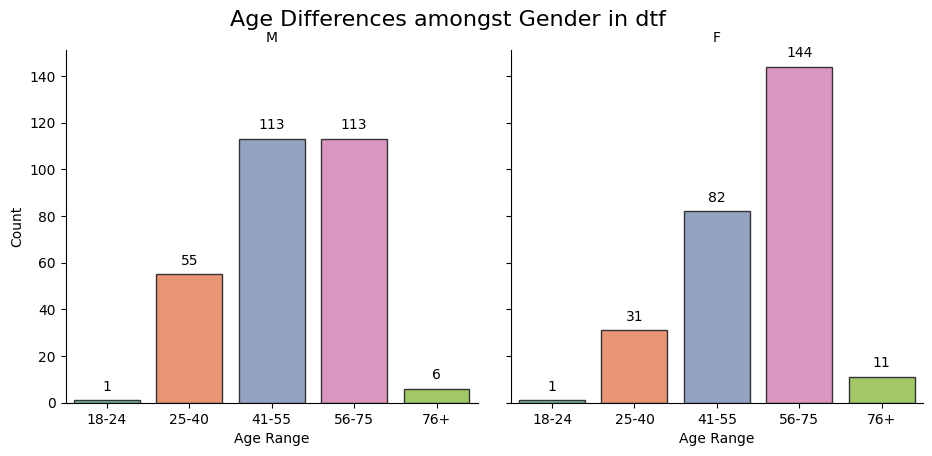

In [16]:
# Age range of male gamblers in dtf
print("Male age differences in dtf:")
print(df[df['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in dtf
print('Female age differences in dtf:')
print(df[df['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

pf.plot_gender_diff(df, 'dtf', figsize=(10, 5))


### Increse and Decrease of SlotDenomination and Bet

In [17]:
# Lets do the same but for bottom 20%
players_increase_slot = cf.count_increase(df, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot = cf.count_decrease(df, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet = cf.count_increase(df, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet = cf.count_decrease(df, "decrease_maxbet", "playerkey", "maxbet")


Count of players who increase_slotdeno : 436
Count of times each player increase_slotdeno : {20: 189, 224: 15, 1069: 1, 1166: 11, 1233: 42, 1959: 7, 6695: 4, 7967: 4, 8978: 19, 9510: 9, 10738: 249, 11584: 2, 12277: 22, 15736: 4, 18082: 1, 23267: 3, 23321: 19, 28710: 2, 32477: 70, 41839: 42, 41939: 2, 42204: 2, 42589: 4, 42613: 308, 42727: 11, 42764: 1, 42832: 2, 42955: 19, 42956: 35, 43364: 751, 43421: 8, 43447: 2, 43526: 5, 43754: 7, 43781: 6, 43820: 2, 44309: 7, 44327: 6, 44603: 19, 44641: 36, 45449: 20, 45604: 5, 45630: 8, 45680: 5, 45719: 1, 45790: 7, 46207: 5, 46281: 3, 46697: 26, 46901: 11, 47275: 42, 47295: 2, 47918: 5, 865: 2, 1442: 3, 2073: 1, 3127: 18, 3634: 25, 4252: 1, 4265: 5, 5147: 4, 5879: 28, 5969: 13, 6271: 13, 6365: 21, 6829: 1, 7195: 1, 7689: 5, 7695: 6, 7933: 3, 8233: 262, 8412: 3, 8465: 2, 10248: 5, 10348: 1, 10349: 2, 12192: 2, 13910: 7, 14778: 1, 15389: 36, 17472: 194, 17497: 7, 18617: 1, 19166: 2, 20496: 2, 23045: 8, 23311: 2, 26502: 2, 27510: 1, 28705: 3, 31032

In [18]:
# Lets do the same but for df_s
players_increase_slot_s = cf.count_increase(df_s, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_s = cf.count_decrease(df_s, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_s = cf.count_increase(df_s, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_s = cf.count_decrease(df_s, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 436
Count of times each player increase_slotdeno : {20: 189, 224: 15, 1069: 1, 1166: 11, 1233: 42, 1959: 7, 6695: 4, 7967: 4, 8978: 19, 9510: 9, 10738: 249, 11584: 2, 12277: 22, 15736: 4, 18082: 1, 23267: 3, 23321: 19, 28710: 2, 32477: 70, 41839: 42, 41939: 2, 42204: 2, 42589: 4, 42613: 308, 42727: 11, 42764: 1, 42832: 2, 42955: 19, 42956: 35, 43364: 751, 43421: 8, 43447: 2, 43526: 5, 43754: 7, 43781: 6, 43820: 2, 44309: 7, 44327: 6, 44603: 19, 44641: 36, 45449: 20, 45604: 5, 45630: 8, 45680: 5, 45719: 1, 45790: 7, 46207: 5, 46281: 3, 46697: 26, 46901: 11, 47275: 42, 47295: 2, 47918: 5, 865: 2, 1442: 3, 2073: 1, 3127: 18, 3634: 25, 4252: 1, 4265: 5, 5147: 4, 5879: 28, 5969: 13, 6271: 13, 6365: 21, 6829: 1, 7195: 1, 7689: 5, 7695: 6, 7933: 3, 8233: 262, 8412: 3, 8465: 2, 10248: 5, 10348: 1, 10349: 2, 12192: 2, 13910: 7, 14778: 1, 15389: 36, 17472: 194, 17497: 7, 18617: 1, 19166: 2, 20496: 2, 23045: 8, 23311: 2, 26502: 2, 27510: 1, 28705: 3, 31032

### Wealth Differences
#### General

In [19]:
# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df['depletion_rate'] = df.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)

# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df_s['depletion_rate'] = df_s.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)


#### Per Visit

In [20]:
# Create dataframe for Machine Learning model
df_ML_v = pf.transform_ml(data_b=df, grouping='visit')

In [21]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_v['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_v = df_ML_v[df_ML_v.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_v))

# Remove players with NaN values
df_ML_v = df_ML_v[~df_ML_v['playerkey'].isin(list_discrepancy_v)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_v['playerkey'].nunique())

Number of unique players in df_ML_v:  557
Number of discrepancies: 18
Number of unique players w/o discrepancies:  539


In [22]:
print(df_ML_v.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'visit', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']


df_ML_v = df_ML_v.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/top_players_ending_balance_by_visit.parquet')

Index(['playerkey', 'visit', 'gender', 'age_range', 'age_gen', 'beginning_amt',
       'ending_amt', 'ending_balance', 'ave_slotdenom', 'std_slotdenom',
       'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '2ws/min

#### Per Session

In [23]:
df_ML_s = pf.transform_ml(data_b=df_s, grouping='session_time')

In [24]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_s['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_s = df_ML_s[df_ML_s.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_s))

# Remove players with NaN values
df_ML_s = df_ML_s[~df_ML_s['playerkey'].isin(list_discrepancy_s)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_s['playerkey'].nunique())

Number of unique players in df_ML_v:  557
Number of discrepancies: 21
Number of unique players w/o discrepancies:  536


In [25]:
print(df_ML_s.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']

df_ML_s = df_ML_s.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/top_player_ending_balance_by_session.parquet')


Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '